# Problem set 4


Andrew Martin

Examining heteroscedascity of university research levels and state grants

03/12/24

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction. [IE a regression line + shadow standard error line]
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.
    - [MY ANSWER] Based on the verticle spread of points on the graph below, there appears to be some degree of heteroscedascity across the research levels at universities. While there is similar spacing or clustering that appears to happen at first, heteroscedasticy appearts to be increasing within each subsequent research level (ie the heteroscedascity for universities that are at research level 2 is great than the heteroscedascity for research level 2 universities while research level 3 universities have a great heteroscedascity than research level 2 universities and so on.

#### Load Data

In [1]:
%set graph_format svg

set error:
    parsing errors:
	[line  2]: 'graph_format svg'


In [2]:
qui log using ProblemSet4.log, replace
set more off

In [6]:
insheet using grants2015_college_affordability20200218.csv, clear
eststo clear

(8 vars, 581 obs)


In [7]:
ds, varwidth(29) alpha

control        highdeg        instnm         stabbr
hgroup         igrnt_low_inc  sgrnt_low_inc  year


#### Set Graph

In [8]:
%set graph_height = 8

graph size was (5.5in, 4in), is now (5.5in, 8).


In [9]:
%set graph_width = 11

graph size was (5.5in, 8), is now (11, 8).


#### Organize/Clean Data

NOTE: In this case I need to (1) relabel variables I will be using, (2) log financial variables, (3) transform [hgroup] from an interval variable into a nominal variable
- Remember: Hgroup can only be transformed into a nominal variable currently using this particular dataset, need to resolve issue of larger data set not permitting this transformation

In [11]:
label variable hgroup "Research Level"
label variable highdeg "Highest Degree Offered"

In [12]:
gen lgrntlow = log(igrnt_low_inc)

(3 missing values generated)


In [13]:
gen lsgrntlow = log(sgrnt_low_inc)

(4 missing values generated)


In [14]:
label variable lgrntlow "Institutional Grants Provided to Low Income Students"
label variable lsgrntlow "State Grants to Low Income Students"
codebook lgrntlow lsgrntlow


-------------------------------------------------------------------------------
lgrntlow                   Institutional Grants Provided to Low Income Students
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.31608146,11.011695]         Units: 1.000e-08
         Unique values: 578                       Missing .: 3/581

                  Mean: 8.27232
             Std. dev.: 1.24853

           Percentiles:     10%       25%       50%       75%       90%
                        6.68727    7.6421   8.44941   9.03796   9.65005

-------------------------------------------------------------------------------
lsgrntlow                                   State Grants to Low Income Students
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1.08846,10.599433]           Units: 1.000e-07
         Unique

In [15]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

#### Create Scatterplot

NOTE: Anh's example

In [ ]:
tw (scatter rincome partyid) ///
(lfitci rincome partyid), ///
ytitle(log income, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("Income and Party Identification" " ", span size(large)) ///
aspect(1, place(west))

NOTE: My attempt with logged state grants (lsgrntlow) and universities research level (hgroup)

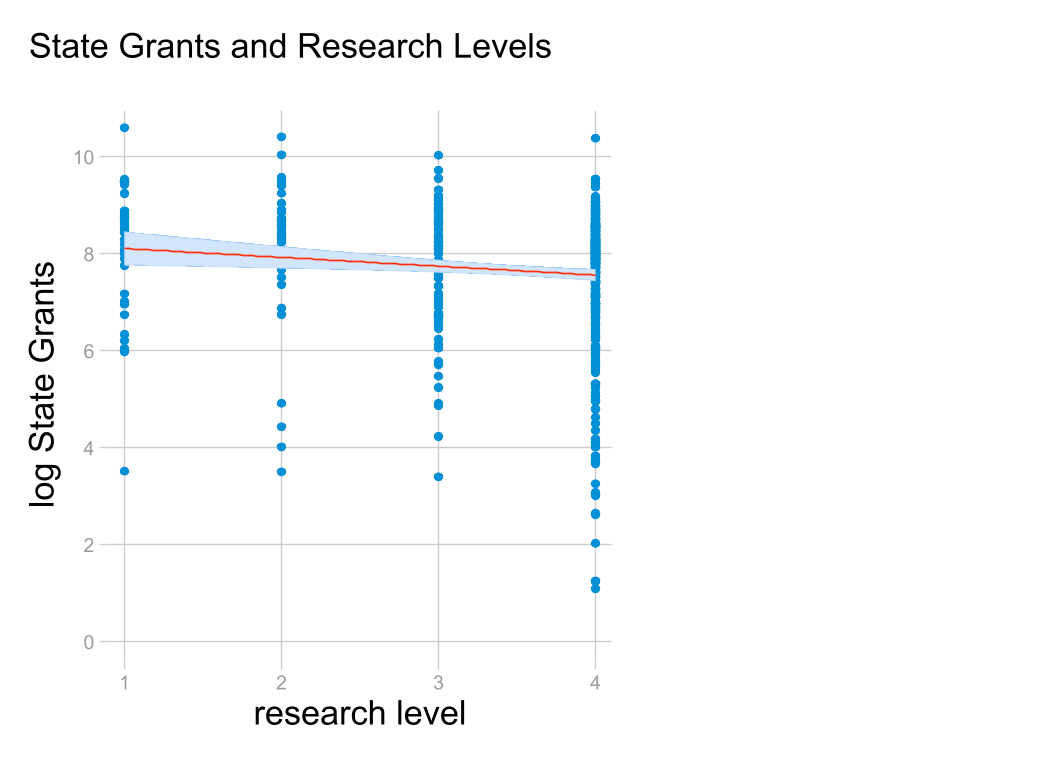

In [17]:
tw (scatter lsgrntlow hgroup) ///
(lfitci lsgrntlow hgroup), ///
ytitle(log State Grants, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("State Grants and Research Levels" " ", span size(large)) ///
aspect(1, place(west))

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity?
    - Consider logging varaibles that are things such as the total count of students at schools, or the total number of a kind of student at a school
    - [My Answer] Logging the variables drastically changes the chi2 level which suggests that there is significant heteroscedascity in my model.

#### Testing for Heteroscedascity Via Breusch-Pagan Test

NOTE: Anh's Example

In [ ]:
quietly reg rincome partyid
estat hettest

NOTE: My attempt with state grants note logged

In [19]:
quietly reg sgrnt_low_inc hgroup
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of sgrnt_low_inc

H0: Constant variance

    chi2(1) = 284.31
Prob > chi2 = 0.0000


NOTE: My attempt with state grants logged

In [18]:
quietly reg lsgrntlow hgroup
estat hettest


Breusch–Pagan/Cook–Weisberg test for heteroskedasticity 
Assumption: Normal error terms
Variable: Fitted values of lsgrntlow

H0: Constant variance

    chi2(1) =   0.90
Prob > chi2 = 0.3432


## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.
    - Bootstrapping is taking random samples from the data sets among the hgroup variable (research level) and lsgrntlow (state grants for low income students). This allows for a secondary assessment of standard error seperate from the Breusch-Pagan test. In this case the chi2 was .90 but the presented standard error below is .07 and .24, which are significantly different from the standard error presented by the Breusch-Pagan test.

In [20]:
eststo: quietly reg lsgrntlow hgroup

(est1 stored)


In [21]:
eststo: quietly bootstrap _b[hgroup], rep(1000) nodots : ///
    reg lsgrntlow hgroup

(est2 stored)


NOTE: Create a Table

In [22]:
esttab, ///
mlabels("OLS" "Bootstrap") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


--------------------------------------------
                      (1)             (2)   
                      OLS       Bootstrap   
--------------------------------------------
hgroup              -0.18**                 
                   (0.07)                   
_bs_1                               -0.18** 
                                   (0.07)   
_cons                8.29***                
                   (0.24)                   
--------------------------------------------
N                     577             577   
--------------------------------------------


## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.
    - [My Answer] While the initial scatterplot led me to believe there might be a high degree of heteroscedascity (based on how I understand how to read that particular graph) the three models I ran examining heteroscedascity actually suggest they are all revealling the same levels. While this would suggest that the OLS model may be an appropriate fit for the data, due to the graphical representation, and my reading/understanding of it, I think that running the additional models was neccesarry.

#### OLS with Robust Standard Errors

In [23]:
eststo: quietly reg lsgrntlow hgroup, robust

(est3 stored)


#### Creating the table with the new model

In [24]:
esttab, ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none)  ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001)


------------------------------------------------------------
                      (1)             (2)             (3)   
                      OLS       Bootstrap          Robust   
------------------------------------------------------------
hgroup              -0.18**                         -0.18** 
                   (0.07)                          (0.07)   
_bs_1                               -0.18**                 
                                   (0.07)                   
_cons                8.29***                         8.29***
                   (0.24)                          (0.25)   
------------------------------------------------------------
N                     577             577             577   
------------------------------------------------------------


## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.

NOTE: I believe we are able to skip five due to issues people are having with different data sets.